In [ ]:
# Install Kaggle API if not already installed
!pip install kaggle

# Authenticate with Kaggle API (ensure you have your kaggle.json in ~/.kaggle/)
!kaggle datasets download -d pkdarabi/brain-tumor-image-dataset-semantic-segmentation

# Extract the downloaded dataset
!unzip brain-tumor-image-dataset-semantic-segmentation.zip -d brain_tumor_dataset


Dataset URL: https://www.kaggle.com/datasets/pkdarabi/brain-tumor-image-dataset-semantic-segmentation
License(s): Attribution 4.0 International (CC BY 4.0)
 97% 81.0M/83.7M [00:03<00:00, 29.2MB/s]
100% 83.7M/83.7M [00:03<00:00, 25.1MB/s]
Archive:  brain-tumor-image-dataset-semantic-segmentation.zip
  inflating: brain_tumor_dataset/README.txt  
  inflating: brain_tumor_dataset/test/1030_jpg.rf.4bfc0ebc72d835cb9668219cd911c249.jpg  
  inflating: brain_tumor_dataset/test/1035_jpg.rf.0dead1ccbe6b1e137ca2d98fc4d34b9a.jpg  
  inflating: brain_tumor_dataset/test/1056_jpg.rf.f539615badbea313d68c957e76642dda.jpg  
  inflating: brain_tumor_dataset/test/1058_jpg.rf.f6d6dcde9564c091b30eb6873641ba36.jpg  
  inflating: brain_tumor_dataset/test/1083_jpg.rf.b1473a76f8f3789c6be693dfbe9bc011.jpg  
  inflating: brain_tumor_dataset/test/1093_jpg.rf.4cde54a1271fe5ecc1f9d6ca4b00f835.jpg  
  inflating: brain_tumor_dataset/test/1125_jpg.rf.6a2f54deeac86ff2d961132a828c9ae6.jpg  
  inflating: brain_tumor_datase

In [ ]:
import os
import shutil

# Create the .kaggle directory
os.makedirs('/root/.kaggle', exist_ok=True)

# Move and rename the uploaded kaggle.json file
shutil.move('/content/kaggle (1).json', '/root/.kaggle/kaggle.json')

# Set permission to avoid permission denied issues
os.chmod('/root/.kaggle/kaggle.json', 600)

print("✅ Kaggle API Key has been set up successfully!")


✅ Kaggle API Key has been set up successfully!


In [ ]:
!pip install pandas matplotlib seaborn scikit-learn


In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class BrainTumorSegmentationDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_filenames = sorted(os.listdir(image_dir))
        self.transform = transform

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.image_filenames[idx])
        image = Image.open(image_path).convert("RGB")  # Convert to RGB

        if self.transform:
            image = self.transform(image)

        return image

# Define transformations (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Load datasets
train_dataset = BrainTumorSegmentationDataset("/content/brain_tumor_dataset/train", transform)
valid_dataset = BrainTumorSegmentationDataset("/content/brain_tumor_dataset/valid", transform)
test_dataset = BrainTumorSegmentationDataset("/content/brain_tumor_dataset/test", transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

print(f"Train samples: {len(train_dataset)}, Validation samples: {len(valid_dataset)}, Test samples: {len(test_dataset)}")


Train samples: 1503, Validation samples: 430, Test samples: 216


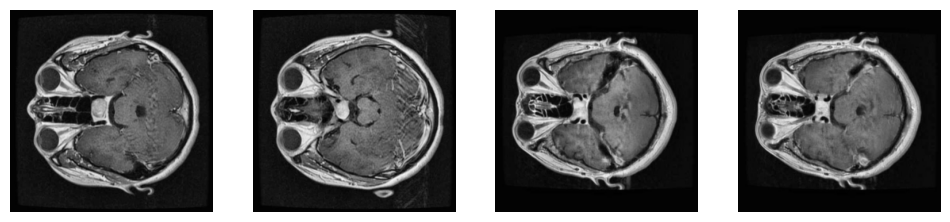

In [ ]:
import matplotlib.pyplot as plt

# Function to display images
def show_images(dataset, num_images=4):
    fig, axes = plt.subplots(1, num_images, figsize=(12, 4))
    for i in range(num_images):
        image = dataset[i]
        image = image.permute(1, 2, 0)  # Convert (C, H, W) to (H, W, C)
        axes[i].imshow(image)
        axes[i].axis("off")
    plt.show()

# Display train images
show_images(train_dataset)


In [ ]:
import os
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image

# Custom Dataset Class
class BrainTumorSegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        """
        Args:
            image_dir (str): Path to the directory containing images.
            mask_dir (str): Path to the directory containing segmentation masks.
            transform (callable, optional): Optional transform to be applied to both images and masks.
        """
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.image_filenames = sorted(os.listdir(image_dir))  # Sort to align with masks
        self.mask_filenames = sorted(os.listdir(mask_dir))  # Sort masks too

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_filenames[idx])
        mask_path = os.path.join(self.mask_dir, self.mask_filenames[idx])

        image = Image.open(img_path).convert("RGB")  # Convert to RGB
        mask = Image.open(mask_path).convert("L")   # Convert to grayscale (L mode)

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask


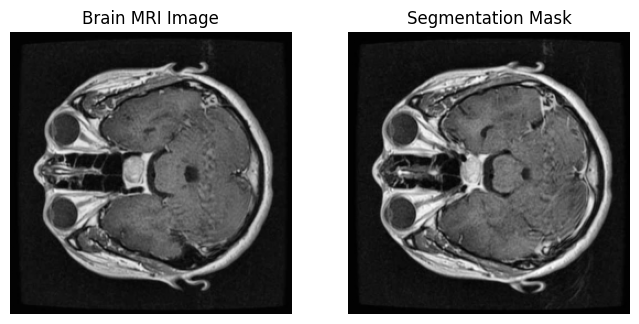

In [ ]:
# Define the dataset paths
train_image_dir = "/content/brain_tumor_dataset/train"
train_mask_dir = "/content/brain_tumor_dataset/valid"

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize for uniformity
    transforms.ToTensor()           # Convert to tensor
])

# Create the dataset
train_dataset = BrainTumorSegmentationDataset(train_image_dir, train_mask_dir, transform=transform)

# Check a sample
image, mask = train_dataset[0]

# Display the first image and mask
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(image.permute(1, 2, 0))  # Convert (C, H, W) to (H, W, C) for visualization
ax[0].set_title("Brain MRI Image")
ax[0].axis("off")

ax[1].imshow(mask.squeeze(), cmap="gray")  # Remove extra dimension & show in grayscale
ax[1].set_title("Segmentation Mask")
ax[1].axis("off")

plt.show()
